In [1]:
# we can preload the wind speed data, otherwise, the tool will do it every time
import xarray as xr
filepath_wind_speed = "/Users/romain/GitHub/windwhisper/dev/fixtures/era5_mean_2013-2022_month_by_hour.nc"
filepath_correction = "/Users/romain/GitHub/windwhisper/dev/fixtures/ratio_gwa2_era5.nc"
def wind_speed_data():
    wind_speed = xr.open_dataset(filepath_wind_speed).to_array().mean(dim="month")
    correction = xr.open_dataset(filepath_correction).to_array()
    correction = correction.sel(variable='ratio_gwa2_era5_mean_WS').interp(latitude=wind_speed.latitude, longitude=wind_speed.longitude, method="linear")
    return wind_speed * correction

In [2]:
data = wind_speed_data()

In [3]:
from windwhisper import windturbines
wind_turbines = {'Turbine 0': {'diameter': 200.0,
               'hub height': 240.0,
               'position': (55.74840260435069, 9.206243110596287),
               'power': 15000.0},
 'Turbine 1': {'diameter': 200.0,
               'hub height': 240.0,
               'position': (55.74670223984771, 9.140099380853458),
               'power': 15000.0},
 'Turbine 2': {'diameter': 200.0,
               'hub height': 240.0,
               'position': (55.734249600379336, 9.206526921380098),
               'power': 15000.0},
 'Turbine 3': {'diameter': 200.0,
               'hub height': 240.0,
               'position': (55.74864349108282, 9.091328259545296),
               'power': 15000.0},
 'Turbine 4': {'diameter': 200.0,
               'hub height': 240.0,
               'position': (55.7467007615353, 9.170468399818262),
               'power': 15000.0}}

#listening_points = {
#    "Listener 1": {"position": (47.3769, 8.5517)},
#    "Listener 2": {"position": (47.3869, 8.552)},
#    "Listener 3": {"position": (47.3461, 8.5175)},
#}

wt = windturbines.WindTurbines(
    wind_turbines=wind_turbines,
    wind_speed_data=data
    #radius_threshold=200.0
    #listeners=listening_points,
)

In [5]:
# this is the noise mapping, for the average wind speed 
# each turbine is exposed to at these locations
# the resolution is currently 100 x 100
# but can be changed by changing the NOISE_MAP_RESOLUTION constant value in noisemap.py
wt.noise_map.noise_level_at_mean_wind_speed

<xarray.DataArray (lat: 100, lon: 100, wind_speed: 1)>
array([[[41.19812677],
        [41.28000013],
        [41.35775458],
        ...,
        [48.34061407],
        [48.09404616],
        [47.81773963]],

       [[41.27481616],
        [41.35749811],
        [41.43589204],
        ...,
        [48.59230702],
        [48.3283253 ],
        [48.03377463]],

       [[41.35275286],
        [41.43627738],
        [41.51533618],
        ...,
...
        ...,
        [48.74672109],
        [48.46894721],
        [48.16385816]],

       [[47.48336184],
        [47.81061484],
        [48.10298576],
        ...,
        [48.50561285],
        [48.24519807],
        [47.95810306]],

       [[47.25672424],
        [47.56441261],
        [47.83828123],
        ...,
        [48.27287831],
        [48.02814481],
        [47.7574777 ]]])
Coordinates:
  * lat         (lat) float64 55.73 55.73 55.73 55.73 ... 55.73 55.73 55.73
  * lon         (lon) float64 9.083 9.085 9.086 9.087 ... 9.212 9.213 9.215
    wind_speed  int64 1

Text(0, 0.5, 'Latitude')

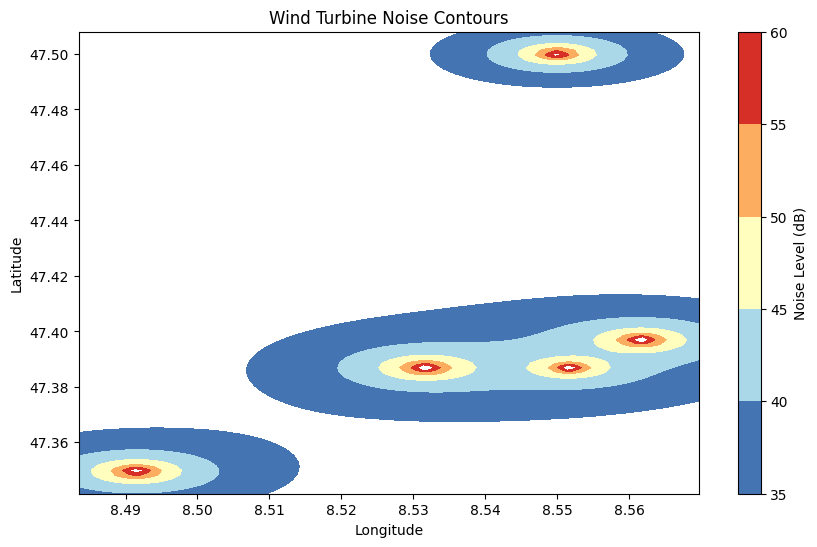

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Define contour levels starting from 35 dB
contour_levels = [35, 40, 45, 50, 55, 60]

# add bounding box
plt.xlim(wt.noise_map.LON.min(), wt.noise_map.LON.max())
plt.ylim(wt.noise_map.LAT.min(), wt.noise_map.LAT.max())

plt.contourf(
    wt.noise_map.LON,  # x-axis, longitude
    wt.noise_map.LAT,  # y-axis, latitude
    wt.noise_map.noise_level_at_mean_wind_speed.sum(dim="wind_speed"),
    levels=contour_levels,
    cmap="RdYlBu_r",
)

plt.colorbar(label="Noise Level (dB)")
plt.title("Wind Turbine Noise Contours")
plt.xlabel("Longitude")  # Correct label for x-axis
plt.ylabel("Latitude")  # Correct label for y-axis